### Analysis about the current US fuel cycle
Includes each of the current reactors and their decommissioning, based on license expirations. This notebook looks specifically at the amount of fuel and enriched U that is required by the current fuel cycle.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
import cymetric as cym
from cymetric import timeseries
from cymetric import filters
from cymetric import tools

import transition_metrics as tm

In [3]:
current_outfile = '../outputs/united_states_2020.sqlite'
mmr_outfile = '../outputs/united_states_mmr.sqlite'
xe100_outfile = '../outputs/united_states_xe100.sqlite'

## Reactors Built and Decommissioned

This section plots the number of each reactor type in the simulation as a function of time

In [28]:
current_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
mmr_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'MMR_enter','MMR_exit']
xe_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill',
             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
             'Xe-100_enter','Xe-100_exit']

In [29]:
current_reactors = tm.rx_commission_decommission(current_outfile, current_nonlwr)
current_reactors = tm.add_year(current_reactors)

mmr_reactors = tm.rx_commission_decommission(mmr_outfile, mmr_nonlwr)
mmr_reactors = tm.add_year(mmr_reactors)
mmr_reactors['mmr_total'] = (mmr_reactors['MMR_enter'] - mmr_reactors['MMR_exit']).cumsum()

xe_reactors = tm.rx_commission_decommission(xe100_outfile, xe_nonlwr)
xe_reactors = tm.add_year(xe_reactors)
xe_reactors['xe_total'] = (xe_reactors['Xe-100_enter'] - xe_reactors['Xe-100_exit']).cumsum()

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


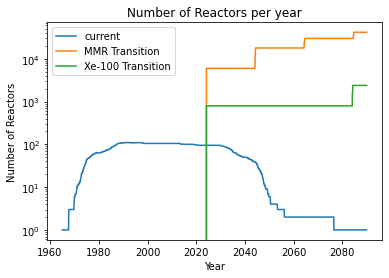

In [30]:
plt.figure()
plt.plot(current_reactors['Year'], current_reactors['lwr_total'], label='current')
plt.plot(mmr_reactors['Year'], mmr_reactors['mmr_total'], label='MMR Transition')
plt.plot(xe_reactors['Year'], xe_reactors['xe_total'], label='Xe-100 Transition')
plt.title('Number of Reactors per year')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
plt.yscale('log')
plt.legend()
plt.savefig('figures/rx_deployment_all.png')

## Eletricity output

In [31]:
current_energy = tm.get_electricity(current_outfile)
mmr_energy = tm.get_electricity(mmr_outfile)
xe_energy = tm.get_electricity(xe100_outfile)

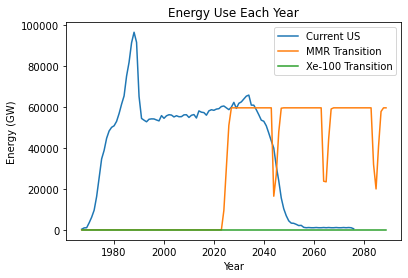

In [32]:
plt.figure()
plt.plot(current_energy['Year'], current_energy['Energy (GW)'], label='Current US')
plt.plot(mmr_energy['Year'], mmr_energy['Energy (GW)'], label='MMR Transition')
plt.plot(xe_energy['Year'], xe_energy['Energy (GW)'], label='Xe-100 Transition')
plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GW)')
plt.legend()
#plt.savefig('figures/energy_all.png')

In [33]:
#Provides level of electricity to set for transitions
current_energy['Energy (GW)'].loc[current_energy['Year'] == 2025]

58    59613.333333
Name: Energy (GW), dtype: float64

# Calculating annual throughputs

## Calculating annual enriched U supplied by enrichment facility (product)

In [34]:
current_leu = tm.calculate_throughput(current_outfile, 'enr_u')
mmr_leu = tm.calculate_throughput(mmr_outfile, 'enr_u')
mmr_haleu = tm.calculate_throughput(mmr_outfile, 'haleu')
xe_leu = tm.calculate_throughput(xe100_outfile, 'enr_u')
xe_haleu = tm.calculate_throughput(xe100_outfile, 'haleu')

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


## Calculating annual feed material

In [35]:
current_feed = tm.calculate_throughput(current_outfile, 'uf6')
mmr_feed = tm.calculate_throughput(mmr_outfile, 'uf6')
xe_feed = tm.calculate_throughput(xe100_outfile, 'uf6')

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


## Calculating annual tails production

In [36]:
current_tails = tm.calculate_throughput(current_outfile, 'tails')
mmr_tails = tm.calculate_throughput(mmr_outfile, 'tails')
xe_tails = tm.calculate_throughput(xe100_outfile, 'tails')

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


## Calculating annual fuel production

In [37]:
current_uox = tm.calculate_throughput(current_outfile, 'fresh_uox')
mmr_uox = tm.calculate_throughput(mmr_outfile, 'fresh_uox')
mmr_triso = tm.calculate_throughput(mmr_outfile, 'TRISO')
xe_uox = tm.calculate_throughput(xe100_outfile, 'fresh_uox')
xe_triso = tm.calculate_throughput(xe100_outfile, 'TRISO')

/home/amandabachmann/transition-scenarios/input/haleu/analysis/transition_metrics.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'][index] = np.round(df['Time'][index] / 12 + 1965, 2)


## Plotting material transactions

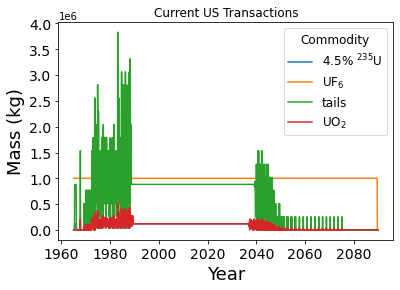

In [25]:
# current fuel cycle
current_commodities = tm.merge_databases([current_leu, current_feed, current_tails, current_uox])
tm.plot_metric(current_commodities, ['Year', 'enr_u', 'uf6', 'tails', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'UF$_6$','tails', r'UO$_2$'])
plt.title('Current US Transactions')
plt.savefig('figures/commodity_demand_2020.png')

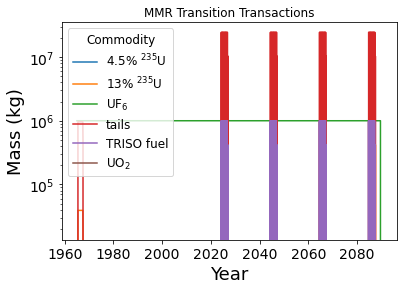

In [46]:
# MMR transition
mmr_commodities = tm.merge_databases([mmr_leu, mmr_haleu, mmr_feed, mmr_tails,
                                      mmr_uox, mmr_triso])
tm.plot_metric(mmr_commodities, ['Year', 'enr_u', 'haleu', 'uf6', 'tails', 'TRISO', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'13% $^{235}$U', 
             r'UF$_6$','tails', 'TRISO fuel', r'UO$_2$'])
plt.title('MMR Transition Transactions')
plt.yscale('log')
plt.savefig('figures/commodity_demand_mmr.png')

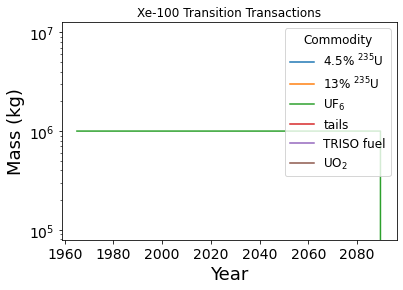

In [39]:
#Xe-100 Transition
xe_commodities = tm.merge_databases([xe_leu, xe_haleu, xe_feed, xe_tails,
                                      xe_uox, xe_triso])
tm.plot_metric(xe_commodities, ['Year', 'enr_u', 'haleu', 'uf6', 'tails', 'TRISO', 'fresh_uox'], 
            ['Year', 'Mass (kg)', 'Commodity', r'4.5% $^{235}$U', r'13% $^{235}$U', 
             r'UF$_6$','tails', 'TRISO fuel', r'UO$_2$'])
plt.title('Xe-100 Transition Transactions')
plt.yscale('log')
plt.savefig('figures/commodity_demand_xe.png')

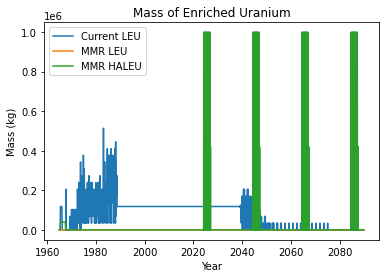

In [50]:
#Comparing enriched uranum transactions
plt.figure()
plt.plot(current_commodities['Year'], current_commodities['enr_u'], label=r'Current LEU')
plt.plot(mmr_commodities['Year'], mmr_commodities['enr_u'], label='MMR LEU')
plt.plot(mmr_commodities['Year'], mmr_commodities['haleu'], label='MMR HALEU')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Mass (kg)')
plt.title('Mass of Enriched Uranium')
plt.savefig('figures/leu_current_mmr.png')

## Determining feed, tails, and product assay

In [ ]:
#Defining assays
x_p = 0.045
x_f = 0.00711
x_t = 0.002

## SWU Calculation
SWU = (P*V(x_p) + T*V(x_t) - F*V(x_f))*t

V(x_i) = (2*x_i-1)*ln(x_i/(1-x_i))

In [ ]:
tm.calculate_SWU(100, x_p, 742.94, x_t, 842.94, x_f)

In [ ]:
SWU = tm.calculate_SWU(enriched_u['enr_u'], x_p, tails['tails'], x_t, uf6['uf6'], x_f)
Annual_SWU = SWU.to_frame().reset_index()
Annual_SWU = tm.add_year(Annual_SWU)
#Annual_SWU.columns
Annual_SWU = Annual_SWU.rename(columns={0:'SWU'})
tm.plot_metric(Annual_SWU, ['Year', 'SWU'], ['Year', 'SWU Capacity Needed', 'Scenario', 'Current US'])